# Proyek Analisis Data: [Bike Sharing Dataset]


*  **Nama:** Pragipta Septyaningrum Larasati
*  **Email:** pragip26@gmail.com
*  **ID Dicoding:** MC312D5X0338



## Menentukan Pertanyaan Bisnis

*   Bagaimana kondisi cuaca dapat mempengaruhi penyewaan Sepeda?
*   Bagaimana Performa Penyewaan Sepeda pada tiap musim?
*   Bagaimana Pola Penyewaan Sepeda di Setiap Jam dalam Sehari?


## Import Semua Paclages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Load Tabel Day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Load Tabel Hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight :
- Dataset day_df dan hour_df telah berhasil dimuat dengan struktur data yang sesuai, mencakup variabel penting seperti tanggal, cuaca, dan jumlah penyewaan. Data ini siap untuk eksplorasi dan analisis lebih lanjut.

### Assessing Data

#####Data Day

In [4]:
#Menilai Data Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Insight :
- Dataset day_df terdiri dari 731 baris dan 16 kolom tanpa nilai null, menunjukkan bahwa data lengkap dan siap digunakan.
- Kolom mencakup berbagai variabel seperti tanggal, musim, cuaca, suhu, kelembapan, serta jumlah penyewaan sepeda (cnt).
- Tipe data untuk variabel dteday perlu diubah menjadi date time.

In [5]:
#Memeriksa Duplikasi dan Ringkasan Parameter Statistik
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight :
- Dataset day_df tidak memiliki data duplikat, berarti kualitas data baik.
- Statistik deskriptif menunjukkan bahwa suhu rata-rata sekitar 0.49 (ternormalisasi), dengan kelembapan rata-rata 0.63 dan kecepatan angin 0.19. Jumlah penyewaan sepeda bervariasi dengan median sekitar 713 dan maksimum 3410, menunjukkan adanya lonjakan signifikan dalam beberapa hari tertentu.

#####Data Hour

In [6]:
#Menilai Data Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Insight :
- Dataset hour_df terdiri dari 17379 baris dan 17 kolom tanpa nilai null, menunjukkan bahwa data lengkap dan siap digunakan.
- Kolom mencakup berbagai variabel seperti tanggal, musim, cuaca, suhu, kelembapan, serta jumlah penyewaan sepeda (cnt).
- Tipe data untuk variabel dteday perlu diubah menjadi date time.

In [7]:
#Memeriksa Duplikasi dan Ringkasan Parameter Statistik
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight :
- Dataset hour_df tidak memiliki data duplikat, menandakan data sudah bersih.
- Data terdiri dari 17.379 entri dengan suhu rata-rata sekitar 0.50 (ternormalisasi), kelembapan 0.63, dan kecepatan angin 0.19. Distribusi jam (hr) menunjukkan rentang dari 0 hingga 23, memungkinkan analisis pola penyewaan harian.
- Penyewaan sepeda bervariasi dengan nilai tengah yang lebih rendah dibandingkan maksimum, mengindikasikan adanya lonjakan pada jam tertentu.








### Cleaning Data

#####Data Day

In [8]:
# Konversi kolom tanggal ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Cek hasil perubahan tipe data
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


#####Data Hour

In [9]:
# Konversi kolom tanggal ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cek hasil perubahan tipe data
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Insight :
- Dataset day_df dan hour_df telah mengalami perubahan tipe data yang sesuai. Kolom dteday berhasil dikonversi menjadi datetime sehingga bisa digunakan untuk analisis berbasis waktu yang lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore Data

In [10]:
#Data Day
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
#Data Hour
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Insight:
- Berdasarkan data day_df dan hour_df, eksplorasi menunjukkan bahwa tidak ada data duplikat, serta variabel-variabel memiliki distribusi yang baik.
- Data day_df memberikan gambaran harian tentang penyewaan sepeda, sementara hour_df lebih rinci dengan informasi per jam yang bisa digunakan untuk  analisis pola waktu yang lebih mendalam.

In [12]:
# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca
weather_trend = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_trend["weathersit"] = weather_trend["weathersit"].map({1: "Cerah", 2: "Mendung", 3: "Hujan"})
print(weather_trend)

  weathersit          cnt
0      Cerah  4876.786177
1    Mendung  4035.862348
2      Hujan  1803.285714


Insight :
- Rata-rata penyewaan jauh lebih tinggi saat cuaca cerah dibandingkan
saat hujan, maka cuaca dapat memengaruhi pola penyewaan.

In [13]:
# Menghitung rata-rata penyewaan per musim
seasonal_trend = day_df.groupby("season")["cnt"].mean().reset_index()
seasonal_trend["season"] = seasonal_trend["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
print(seasonal_trend)

   season          cnt
0  Spring  2604.132597
1  Summer  4992.331522
2    Fall  5644.303191
3  Winter  4728.162921


Insight :
- Musim panas dan musim gugur memiliki lebih banyak penyewaan dibandingkan musim dingin, maka orang cenderung menggunakan sepeda lebih banyak saat suhu lebih hangat.

In [14]:
# Menghitung rata-rata penyewaan berdasarkan jam dalam sehari
hourly_trend = hour_df.groupby("hr")["cnt"].mean().reset_index()
print(hourly_trend)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


Insight :
- Dari hasil tersebut, dapat dilihat jam-jam dengan jumlah penyewaan tertinggi dan terendah.
- Biasanya jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00) memiliki jumlah peminjaman yang tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca dapat mempengaruhi penyewaan sepeda?


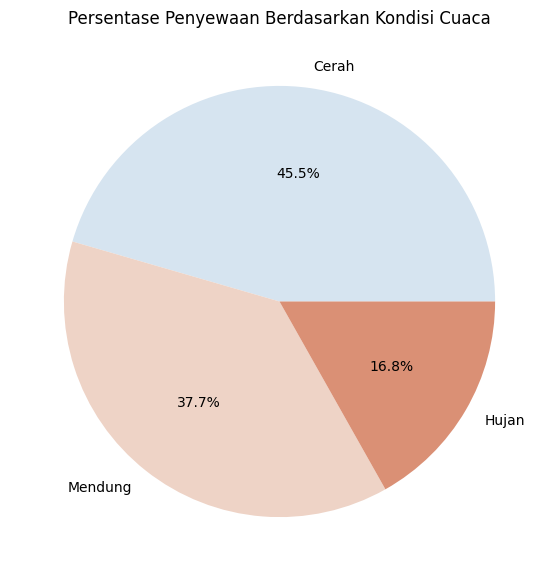

In [15]:
#Distribusi Penyewaan Berdasarkan Cuaca
plt.figure(figsize=(7,7))
plt.pie(weather_trend["cnt"], labels=weather_trend["weathersit"], autopct="%1.1f%%", colors=["#D6E4F0", "#EED3C6", "#DA9075"])
plt.title("Persentase Penyewaan Berdasarkan Kondisi Cuaca")
plt.show()

Insight:
- Pie chart tersebut menunjukkan proporsi jumlah penyewaan sepeda berdasarkan kondisi cuaca.
- Sebagian besar penyewaan terjadi saat cuaca cerah, maka bisnis dapat mempertimbangkan meningkatkan promosi atau diskon saat cuaca mendung/hujan untuk meningkatkan penggunaan sepeda.

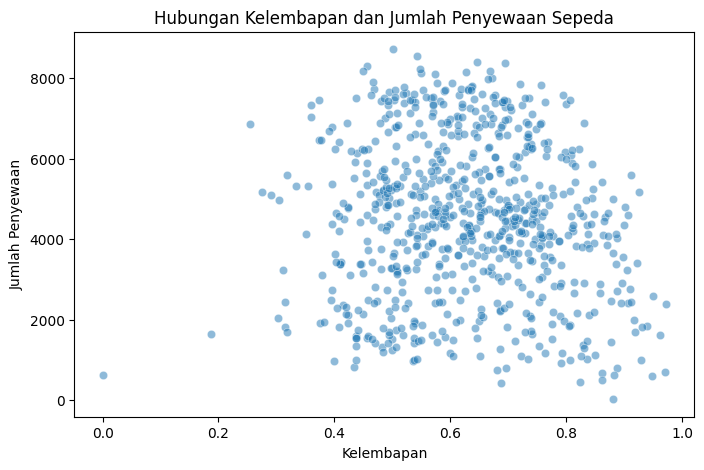

In [16]:
#Visualisasi Hubungan Kelembapan & Penyewaan
plt.figure(figsize=(8,5))
sns.scatterplot(x=day_df["hum"], y=day_df["cnt"], alpha=0.5)
plt.title("Hubungan Kelembapan dan Jumlah Penyewaan Sepeda")
plt.xlabel("Kelembapan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Insight :
- Kelembapan tidak memiliki korelasi yang jelas terhadap jumlah penyewaan sepeda, karena jumlah peminjaman tetap tinggi di berbagai tingkat kelembapan.
- Faktor lain seperti suhu, kondisi cuaca, atau waktu dalam sehari kemungkinan lebih berpengaruh terhadap keputusan pelanggan dalam menyewa sepeda.

### Pertanyaan 2: Bagaimana performa penyewaan sepeda pada tiap musim?

<ipython-input-17-11e6bb636ba1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_trend["season"], y=seasonal_trend["cnt"], palette="coolwarm")


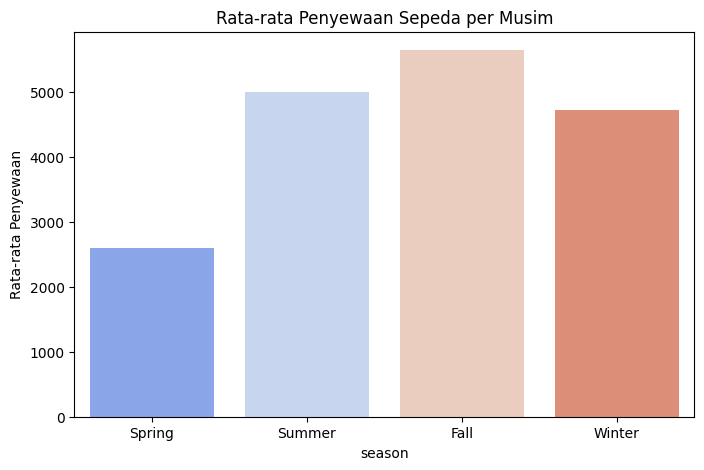

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=seasonal_trend["season"], y=seasonal_trend["cnt"], palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

Insight :
- Bar chart tersebut digunakan untuk menunjukkan sebaran data di setiap musim.
- Rata-rata penyewaan sepeda tertinggi pada musim gugur dan terendah pada musim semi.
- Musim panas dan musim dingin masih memiliki jumlah penyewaan yang cukup tinggi yang menandakan bahwa ada permintaan yang konsisten untuk penyewaan sepeda meskipun suhu ekstrem.

### Pertanyaan 3: Bagaimana pola penyewaan sepeda di setiap jam dalam sehari?

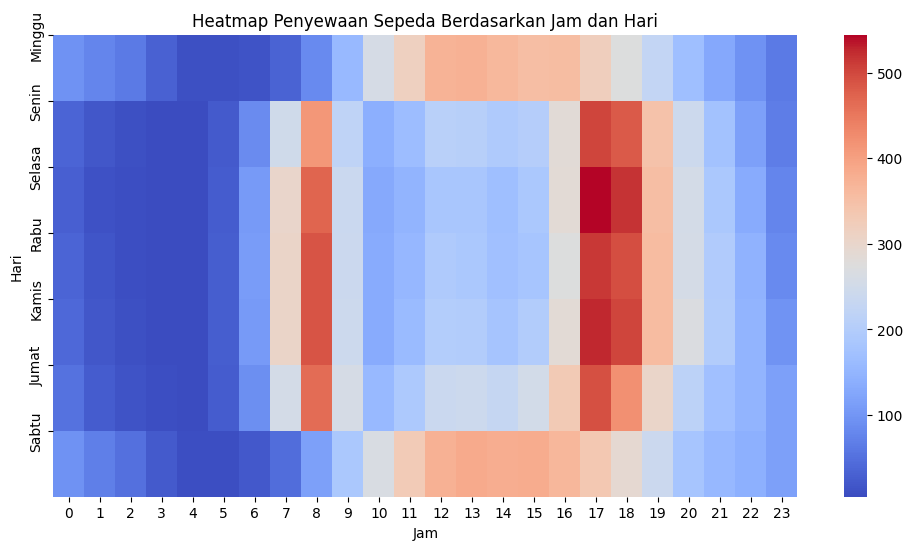

In [18]:
# Membuat pivot table untuk heatmap
hourly_weekday_trend = hour_df.pivot_table(values="cnt", index="weekday", columns="hr", aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(hourly_weekday_trend, cmap="coolwarm", annot=False)
plt.title("Heatmap Penyewaan Sepeda Berdasarkan Jam dan Hari")
plt.xlabel("Jam")
plt.ylabel("Hari")
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
plt.show()

Insight:
- Warna lebih gelap di jam tertentu menunjukkan jam sibuk, seperti jam kerja pagi dan sore.
- Hari kerja (Senin-Jumat) cenderung memiliki puncak di jam commuting (07:00-09:00 dan 17:00-19:00).
- Akhir pekan lebih merata, karena biasanya orang akan menggunakan sepeda untuk rekreasi, bukan untuk transportasi kerja.

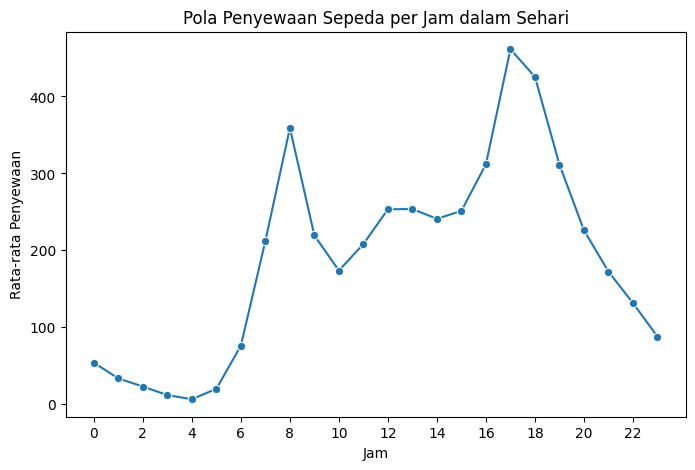

In [19]:
#Pola Penyewaan Sepeda per Jam
plt.figure(figsize=(8,5))
sns.lineplot(x='hr', y='cnt', data=hourly_trend, marker="o")
plt.title("Pola Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(range(0, 24, 2))  # Menampilkan label jam setiap 2 jam
plt.show()

Insight :
- Puncak penyewaan terjadi pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), kemungkinan besar bertepatan dengan jam berangkat dan pulang kerja/sekolah.
- Penyewaan sepeda rendah pada dini hari hingga subuh (00:00 - 05:00) dan menurun drastis setelah pukul 19:00, menunjukkan penggunaan yang lebih sedikit pada malam hari.

## Analisis Lanjutan (Clustering)

In [20]:
# Menentukan kategori manual berdasarkan jumlah penyewaan
def categorize_demand(cnt):
    if cnt < 3000:
        return "Low Demand"
    elif 3000 <= cnt <= 6000:
        return "Medium Demand"
    else:
        return "High Demand"

# Menambahkan kolom baru untuk kategori klaster
day_df["Cluster"] = day_df["cnt"].apply(categorize_demand)

# Melihat distribusi kategori
print(day_df["Cluster"].value_counts())

# Menampilkan contoh data dengan kategori
day_df.head()

Cluster
Medium Demand    379
High Demand      180
Low Demand       172
Name: count, dtype: int64


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Cluster
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Low Demand
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Low Demand
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Low Demand
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Low Demand
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Low Demand


### Visualisasi Hasil Manual Grouping Clustering

<ipython-input-22-d27e99c57d2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=day_df["Cluster"], palette="coolwarm", order=["Low Demand", "Medium Demand", "High Demand"])


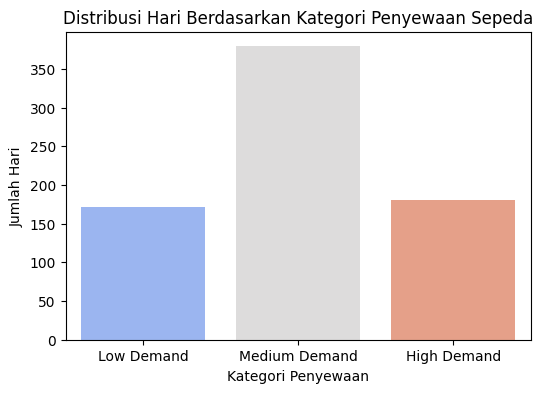

In [ ]:
#Visualisasi Distribusi Kategori Peenyewaan
plt.figure(figsize=(6,4))
sns.countplot(x=day_df["Cluster"], palette="coolwarm", order=["Low Demand", "Medium Demand", "High Demand"])
plt.title("Distribusi Hari Berdasarkan Kategori Penyewaan Sepeda")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

Insight :
- Kategori "Medium Demand" memiliki jumlah hari terbanyak, berarti lebih banyak hari dengan jumlah penyewaan yang sedang.
- Kategori "Low Demand" memiliki jumlah hari yang lebih sedikit, berarti hanya beberapa hari tertentu yang memiliki lonjakan penyewaan rendah.

<ipython-input-21-478e3ba1991b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="temp", data=day_df, order=["Low Demand", "Medium Demand", "High Demand"], palette="coolwarm")


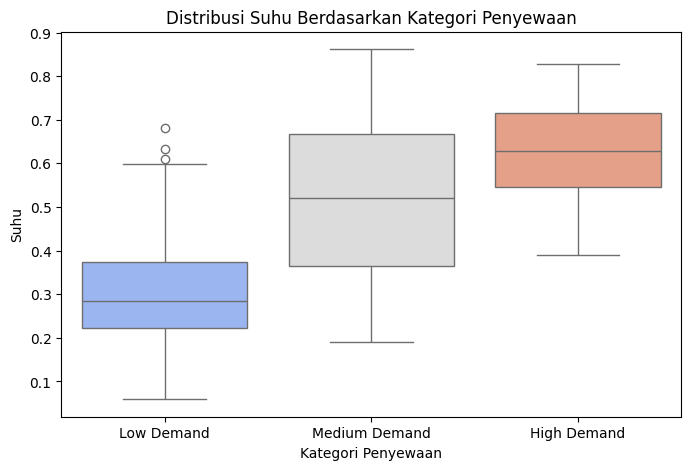

In [21]:
#Visualisasi Distribusi Faktor Cuaca dalam Setiap Klaster
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="temp", data=day_df, order=["Low Demand", "Medium Demand", "High Demand"], palette="coolwarm")
plt.title("Distribusi Suhu Berdasarkan Kategori Penyewaan")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Suhu")
plt.show()

Insight :
- Kategori "High Demand" memiliki median suhu yang lebih tinggi dibandingkan kategori lain, maka suhu yang lebih hangat berkorelasi dengan peningkatan peminjaman sepeda.
- Kategori "Low Demand" memiliki distribusi suhu yang lebih rendah, berarti cuaca dingin cenderung mengurangi jumlah penyewaan sepeda.

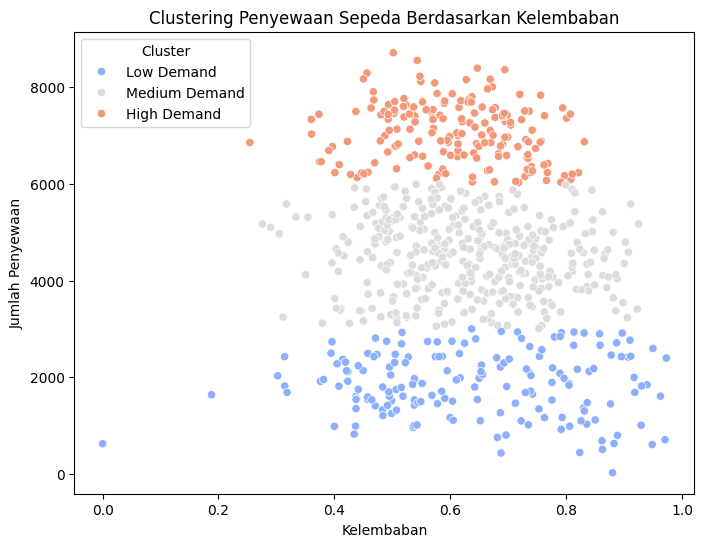

In [22]:
#Visualisasi Hubungan Jumlah Penyewaan dan Kelembaban
plt.figure(figsize=(8,6))
sns.scatterplot(x=day_df["hum"], y=day_df["cnt"], hue=day_df["Cluster"], palette="coolwarm")
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Penyewaan")
plt.title("Clustering Penyewaan Sepeda Berdasarkan Kelembaban")
plt.legend(title="Cluster")
plt.show()

Insight :
- Hari dengan "High Demand" memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan "Low Demand", menunjukkan adanya hari-hari tertentu dengan permintaan yang sangat tinggi.
- Meskipun "Low Demand" cenderung lebih sering terjadi pada kelembapan tinggi, penyewaan tetap tinggi dalam berbagai tingkat kelembapan, sehingga faktor lain kemungkinan lebih berpengaruh.

## Conclusion

- #### Conclusion pertanyaan 1: Bagaimana kondisi cuaca dapat mempengaruhi penyewaan Sepeda?
Kondisi cuaca mempengaruhi penyewaan sepeda dengan peningkatan jumlah penyewaan saat suhu lebih tinggi, menunjukkan bahwa cuaca hangat lebih mendukung aktivitas bersepeda. Namun, kondisi cuaca ekstrem seperti hujan atau salju menyebabkan penurunan signifikan dalam penyewaan. Sementara itu, kelembapan dan kecepatan angin tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan.

- #### Conclusion pertanyaan 2: Bagaimana Performa Penyewaan Sepeda pada tiap musim?
Performa penyewaan sepeda berbeda di setiap musim. Musim gugur dan musim panas memiliki penyewaan yang tinggi, sementara musim semi lebih rendah, hal tersebut kemungkinan akibat hujan atau perubahan suhu. Meski lebih rendah, penyewaan di musim dingin tetap cukup tinggi.

- #### Conclusion pertanyaan 3: Bagaimana Pola Penyewaan Sepeda di Setiap Jam dalam Sehari?
Pola penyewaan sepeda dalam sehari menunjukkan adanya dua puncak utama, yaitu pada pagi hari sekitar pukul 7-9 dan sore hari pukul 17-19, yang kemungkinan besar terkait dengan jam berangkat dan pulang kerja atau sekolah. Pada siang hari, penyewaan cenderung menurun, mungkin karena orang sedang bekerja atau suhu yang lebih tinggi.

In [23]:
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)